**Assignment-1**

In [28]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation
from keras.datasets import mnist
from keras.utils import np_utils
from sklearn import metrics
import numpy as np

In [29]:
(xt,yt),(xte,yte)=mnist.load_data()

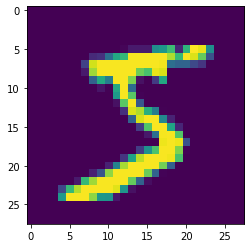

In [30]:
import matplotlib.pyplot as plt
plt.imshow(xt[0])
plt.show()

In [31]:
xt=xt.reshape(60000,784).astype('float32')
xte=xte.reshape(10000,784).astype('float32')
xt/=255
xte/=255

In [32]:
nb_classes = 10 # number of unique digits

Yt= np_utils.to_categorical(yt, nb_classes)
Yte = np_utils.to_categorical(yte, nb_classes)
yto=np.zeros([yt.shape[0],nb_classes])
yteo=np.zeros([yte.shape[0],nb_classes])
for i in range(yt.shape[0]):
    yto[i][yt[i]]=1
for i in range(yte.shape[0]):
    yteo[i][yte[i]]=1

In [33]:
model=Sequential()                        #Linear stacking of layers

model.add(Dense(512,input_shape=(784,)))  #First layer with 512 nodes
model.add(Activation('relu'))             #Relu activation function 

model.add(Dense(50))                      #second layer with 50 nodes
model.add(Activation('relu'))             #relu activation layer
model.add(Dropout(0.2))                   #20% dropout of randomly selected nodes

model.add(Dense(10))                      #Final layer with 10 nodes and
model.add(Activation('softmax'))          #softmax activation function

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
model.fit(x=xt,y=yto,batch_size=64,epochs=20)

Epoch 1/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2653 - accuracy: 0.9212
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1079 - accuracy: 0.9674
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0726 - accuracy: 0.9782
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0548 - accuracy: 0.9833
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0447 - accuracy: 0.9856
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0351 - accuracy: 0.9884
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0278 - accuracy: 0.9907
Epoch 8/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0251 - accuracy: 0.9918
Epoch 9/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0200 - accuracy: 0.9936
Epoch 10/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0199 - accuracy: 0.9938

In [36]:
score = model.evaluate(xte,yteo)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0902 - accuracy: 0.9838
Test score: 0.09021486341953278
Test accuracy: 0.9837999939918518


In [37]:
preds=model.predict(xte)
print(preds.shape)

313/313 [==============================] - 0s 868us/step
(10000, 10)


In [38]:
print(preds[1].argmax(),yteo[1].argmax())

2 2


In [39]:
preds=np.array([preds[i].argmax() for i in range(len(preds))])

In [40]:
print(metrics.precision_score(y_true=yte,y_pred=preds,labels=[1],average=None))

[0.99381625]


In [41]:
print(metrics.recall_score(y_true=yte,y_pred=preds,labels=[1],average=None))

[0.99118943]


In [42]:
model.summary()#categorical cross entropy loss function is used

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 activation_5 (Activation)   (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 50)                25650     
                                                                 
 activation_6 (Activation)   (None, 50)                0         
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                510       
                                                                 
 activation_7 (Activation)   (None, 10)               

**acuuracy**: 98.35%<br>
**loss**: 0.094(categorical cross entropy loss)<br>
**precision for digit 1**: 0.99381625<br>
**recall for digit 1**:0.99118943 <br>

**Assignment-2**

In [16]:
(xt,yt),(xte,yte)=mnist.load_data()

In [17]:
xt=xt.reshape(60000,784).astype('float32')
xte=xte.reshape(10000,784).astype('float32')
xt/=255
xte/=255

In [18]:
model=Sequential()                        #Linear stacking of layers

model.add(Dense(512,input_shape=(784,)))  #First layer with 512 nodes
model.add(Activation('relu'))#Relu activation function
model.add(Dropout(0.2)) 

model.add(Dense(50))                      #second layer with 50 nodes
model.add(Activation('relu'))             #relu activation layer
model.add(Dropout(0.2))                   #20% dropout of randomly selected nodes

model.add(Dense(1))                      #Final layer with 10 nodes and
#model.add(Activation('relu'))    

In [19]:
model.compile(loss=tensorflow.keras.losses.MeanSquaredError(), optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x=xt,y=yt,batch_size=64,epochs=300)

In [20]:
model=keras.models.load_model("regmodel")

In [21]:
score = model.evaluate(xte,yte)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.3540 - accuracy: 0.2053
Test score: 0.3539540767669678
Test accuracy: 0.2053000032901764


In [22]:
preds=model.predict(xte)

313/313 [==============================] - 0s 998us/step


In [23]:
rmse=0
for i in range(len(preds)):
    rmse+=(preds[i]-yte[i])**2
print((rmse/len(preds))**0.5)

[0.594939]


In [24]:
preds=np.round(preds)
acc=0
for i in range(len(preds)):
    if preds[i]==yte[i]:
        acc+=1
print(acc/len(preds))

0.9259


In [25]:
print(metrics.precision_score(y_true=yte,y_pred=preds,labels=[1],average=None))

[0.97137746]


In [26]:
print(metrics.recall_score(y_true=yte,y_pred=preds,labels=[1],average=None))

[0.95682819]


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                25650     
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5

**acuuracy**: 92.59%<br>
**loss**: 0.594939(rmse)<br>
**precision for digit 1**: 0.97137746<br>
**recall for digit 1**:0.95682819 <br>